In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap


In [3]:
df = pd.read_csv("Batches/Batch_1.csv")

In [4]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,12039452,JD219469,04/28/2020 09:26:00 PM,055XX S PRAIRIE AVE,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,False,True,...,20.0,40.0,04B,1178988.0,1868179.0,2020,09/07/2021 03:41:02 PM,41.793577,-87.619197,"(41.793577452, -87.619197044)"
29996,12192474,JD398466,10/13/2020 12:30:00 PM,004XX E BOWEN AVE,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,NURSING / RETIREMENT HOME,False,False,...,3.0,38.0,26,1179822.0,1877577.0,2020,10/20/2020 03:42:21 PM,41.819347,-87.615851,"(41.819347317, -87.615851173)"
29997,12136248,JD333037,08/15/2020 03:41:00 AM,083XX S BUFFALO AVE,141B,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,APARTMENT,False,False,...,10.0,46.0,15,1199591.0,1850271.0,2020,08/22/2020 04:17:17 PM,41.743942,-87.544251,"(41.743942363, -87.544251483)"
29998,12095658,JD284826,07/03/2020 05:30:00 PM,090XX S COMMERCIAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,10.0,46.0,08B,1197713.0,1845639.0,2020,07/21/2020 03:41:07 PM,41.731279,-87.551287,"(41.731278845, -87.551286711)"


/var/folders/wy/ywq4p_fn3rs7bwl5380slwzh0000gn/T/ipykernel_86204/2909409197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["Year"] = ([x[0].split('/')[-1] for x in (newdf["Date"].str.split())])
/var/folders/wy/ywq4p_fn3rs7bwl5380slwzh0000gn/T/ipykernel_86204/2909409197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["Month"] = ([x[0].split('/')[0] for x in (newdf["Date"].str.split())])


          ID Case Number                    Date                    Block  \
0   11037294    JA371270  03/18/2015 12:00:00 PM        0000X W WACKER DR   
1   11646293    JC213749  12/20/2018 03:00:00 PM     023XX N LOCKWOOD AVE   
2   11645836    JC212333  05/01/2016 12:25:00 AM      055XX S ROCKWELL ST   
3   11645959    JC211511  12/20/2018 04:00:00 PM       045XX N ALBANY AVE   
4   11645601    JC212935  06/01/2014 12:01:00 AM      087XX S SANGAMON ST   
..       ...         ...                     ...                      ...   
95  12122483    JD316923  07/31/2020 11:15:00 PM  021XX N SPRINGFIELD AVE   
96  12098557    JD288415  02/01/2019 12:01:00 AM          025XX W 50TH ST   
97  12201546    JD408379  10/22/2020 09:55:00 AM       044XX N SEELEY AVE   
98  12146876    JD345261  08/10/2020 08:30:00 AM         030XX N CLARK ST   
99  11650067    JC218386  07/28/2013 12:00:00 PM     003XX S MICHIGAN AVE   

    IUCR         Primary Type                              Description  \
0

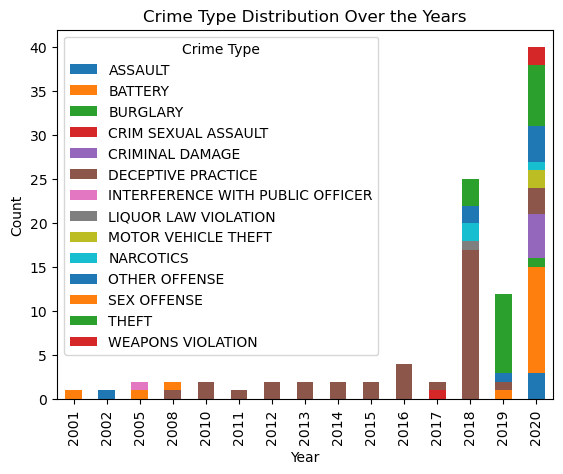

In [39]:
list(df.columns)
newdf = df.head(100)

newdf["Year"] = ([x[0].split('/')[-1] for x in (newdf["Date"].str.split())])
newdf["Month"] = ([x[0].split('/')[0] for x in (newdf["Date"].str.split())])
print(newdf)
cross_table = pd.crosstab(newdf['Year'], newdf['Primary Type'])


cross_table.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Type Distribution Over the Years')
plt.legend(title='Crime Type')
plt.show()


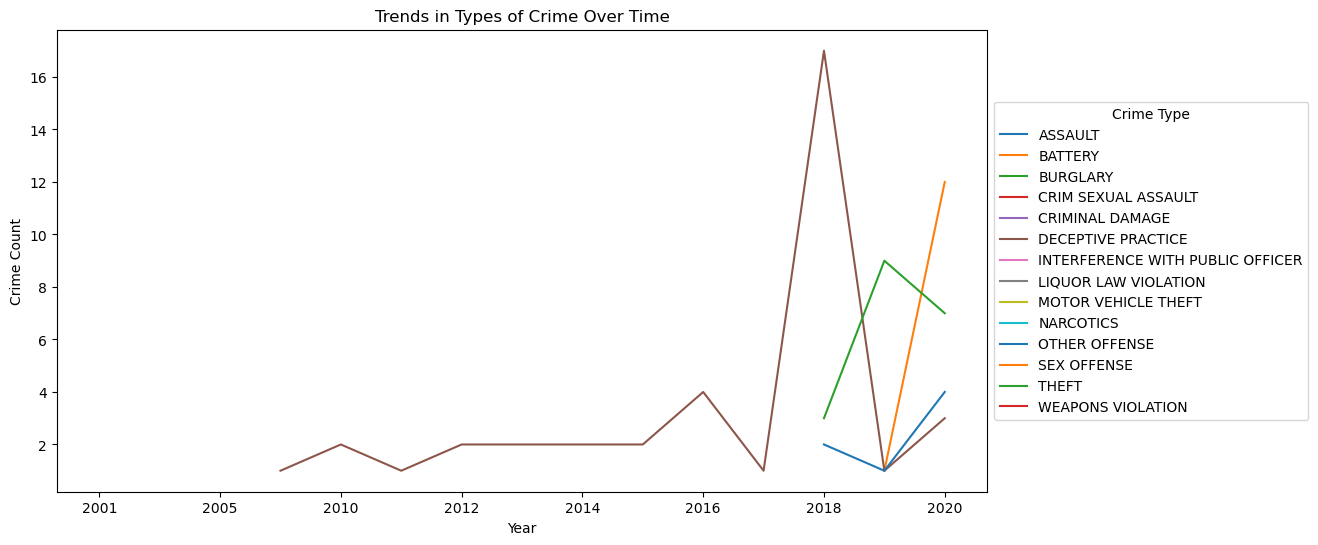

In [27]:
crime_counts = newdf.groupby(['Year', 'Primary Type']).size().unstack()


crime_counts.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Types of Crime Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

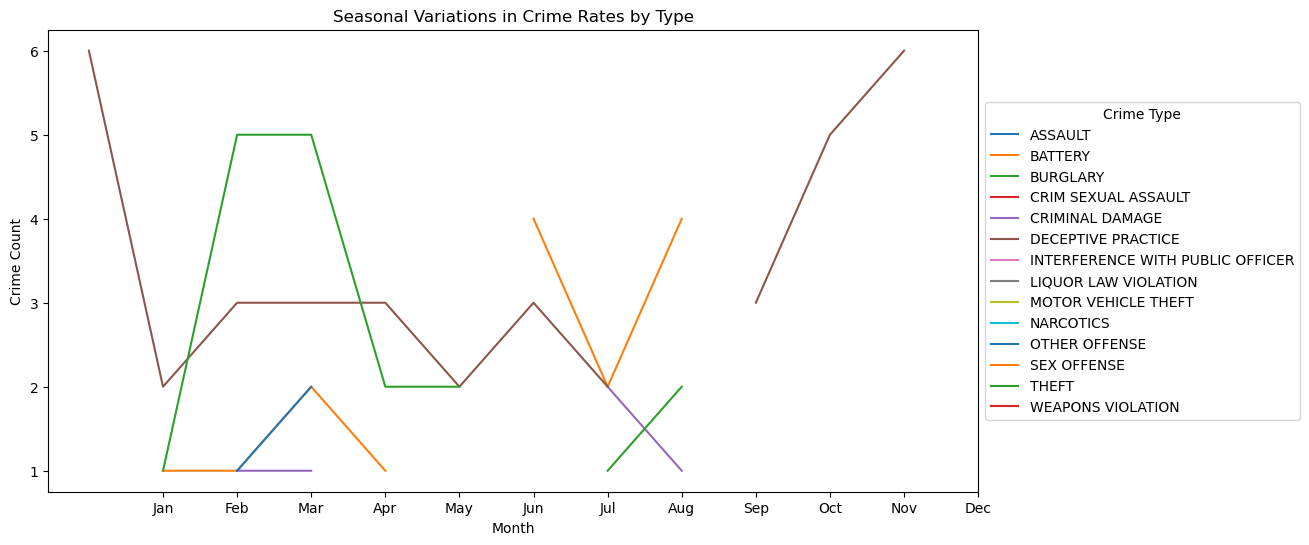

In [28]:
crime_counts_by_month = newdf.groupby(['Month', 'Primary Type']).size().unstack()

crime_counts_by_month.plot(kind='line', figsize=(12, 6))
plt.title('Seasonal Variations in Crime Rates by Type')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [46]:
mapdf = newdf.dropna(subset=['Latitude', 'Longitude'])
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)


for index, row in mapdf.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)


m.save("crime_map.html")

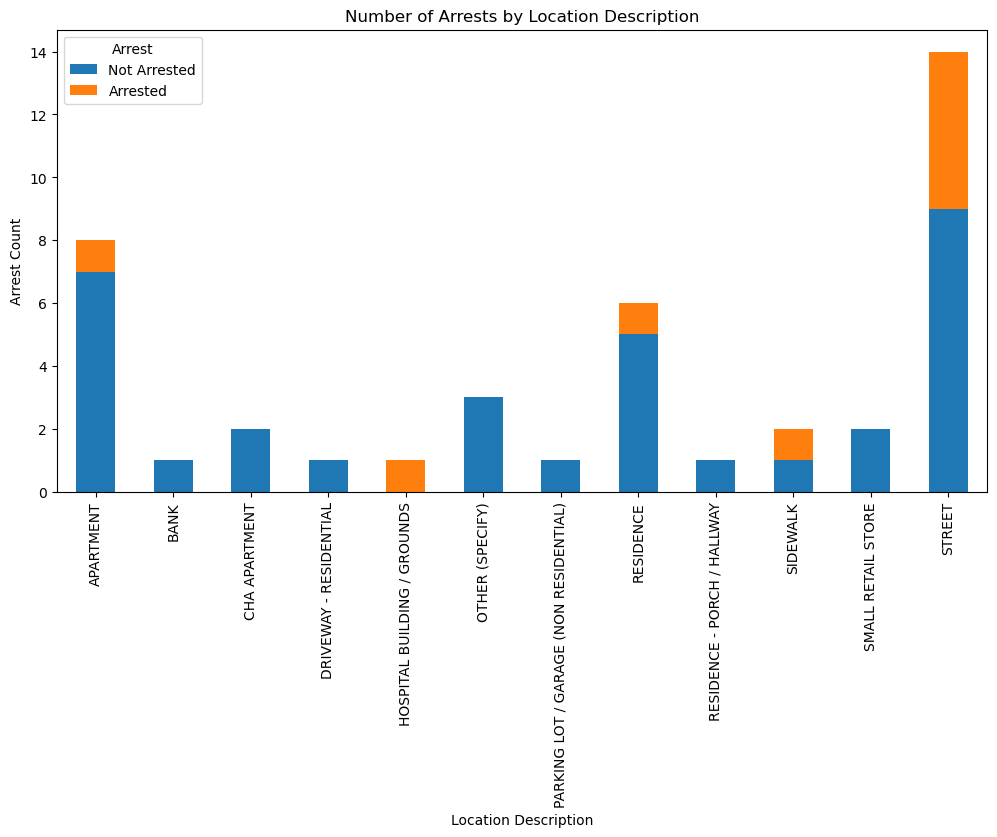

In [47]:
arrest_counts = newdf.groupby(['Location Description', 'Arrest']).size().unstack().fillna(0)


arrest_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Arrests by Location Description')
plt.xlabel('Location Description')
plt.ylabel('Arrest Count')
plt.legend(title='Arrest', labels=['Not Arrested', 'Arrested'])
plt.show()